# Compute the sensitivity of SHADOWS to the scalar portal

In [1]:
]st

Status `~/Documents/Research/Projects/SensCalc/Code/SensMC/Project.toml`
⌃ [336ed68f] CSV v0.10.8
⌃ [a93c6f00] DataFrames v1.4.4
  [864edb3b] DataStructures v0.18.13
⌃ [31c24e10] Distributions v0.25.86
⌃ [e9467ef8] GLMakie v0.8.2
⌃ [5c1252a2] GeometryBasics v0.4.6
  [7073ff75] IJulia v1.24.0
⌃ [682c06a0] JSON v0.21.3
  [3f54b04b] LorentzVectors v0.4.3
  [ea0cff06] MDBM v0.1.6 `https://github.com/JLTastet/MDBM.jl#3788144`
⌅ [ee78f7c6] Makie v0.19.2
  [c03570c3] Memoize v0.4.4
  [e1d29d7a] Missings v1.1.0
  [3b2b4ff1] Multisets v0.4.4
⌃ [bac558e1] OrderedCollections v1.4.1
  [c46f51b8] ProfileView v1.7.1
  [438e738f] PyCall v1.95.1
  [d330b81b] PyPlot v2.11.1
⌃ [f2b01f46] Roots v2.0.10
⌃ [90137ffa] StaticArrays v1.5.18
⌅ [2913bbd2] StatsBase v0.33.21
  [8ba89e20] Distributed
  [37e2e46d] LinearAlgebra
  [1a1011a3] SharedArrays
Info Packages marked with ⌃ and ⌅ have new versions available, but those with ⌅ are restricted by compatibility constraints from upgrading. To see why use `status 

In [2]:
using Random
Random.seed!(12903);

In [3]:
include("$(@__DIR__)/../lib/IncludeAll.jl")
include("$(@__DIR__)/../scripts/GenerateEvents.jl")
include("$(@__DIR__)/../scripts/ScanSensitivity.jl");

  Activating project at `~/Documents/Research/Projects/SensCalc/Code/SensMC`


In [4]:
@time mS, θ, debug = find_scalar_portal_sensitivity_mdbm(
    range(log10(0.1), log10(5), length=25),
    range(-5.5, -1, length=10), (1., 0.),
    5e19, :fairship_beauty, ["B -> S pi", "B -> S K?"],
    SHADOWS_geometry_LoI;
    target_atomic_weight=56., # Iron target
    iterations=3, Nsamples=8000000, CL=0.9,
    acceptance=:two_tracks_zero_charge,
    meson_spectrums_root="$(@__DIR__)/../data/FairShip")

┌ Warning: Reached the end of the meson list, looping back. This may violate the i.i.d. assumption.
└ @ Main ~/Documents/Research/Projects/SensCalc/Code/SensMC/scripts/GenerateEvents.jl:50


19845.479220 seconds (129.86 G allocations: 6.635 TiB, 2.58% gc time, 0.03% compilation time: 5% of which was recompilation)


([0.10102790842249722, 0.10309745621127248, 0.10521034159098998, 0.10752479564670957, 0.10736676132851186, 0.10970993702920515, 0.10956583388435373, 0.11196674178075221, 0.11181051608561493, 0.11425643096022031  …  4.051498170476322, 4.10173772310055, 4.052437046195875, 4.016571279270994, 3.986886120970302, 4.0943729849498744, 4.1134506224008245, 4.10109404489526, 4.079341161095822, 4.054857448618834], [0.0007007110403263266, 0.000693813345049022, 0.0006870089812512899, 0.0006820299789014558, 0.0006806151439939654, 0.0006749650370592457, 0.0006741043440129118, 0.0006675457529211907, 0.0006674524405674346, 0.0006606823942348364  …  6.701387234628789e-6, 9.492985964946033e-6, 1.0899955635070556e-5, 1.209383491157012e-5, 1.3262045184723609e-5, 7.170614372913137e-6, 8.05907265065277e-6, 9.17784692861519e-6, 1.0236864633905194e-5, 1.1247873346053883e-5], (mass_evaluated = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1  …  5.000000000000001, 5.000000000000001, 5.000000000000001, 5.0000000

Save the raw output (may require further processing):

In [5]:
save_sensitivity_mdbm("$(@__DIR__)/../tables/sensitivity/SHADOWS", "SHADOWS_scalar_sensitivity_CL90", mS, θ, debug; column_names=("mS", "theta"))

Save the curve as an unordered list of $(m_S, \theta^2)$ pairs:

In [6]:
using MDBM
using DataFrames
x, y = getinterpolatedsolution(debug.mdbm)
df = DataFrame(mS = 10.0 .^ x, theta2 = (10.0 .^ y) .^ 2)

Row,mS,theta2
,Float64,Float64
1,0.101028,4.90996e-7
2,0.103097,4.81377e-7
3,0.10521,4.71981e-7
4,0.107525,4.65165e-7
5,0.107367,4.63237e-7
6,0.10971,4.55578e-7
7,0.109566,4.54417e-7
8,0.111967,4.45617e-7
9,0.111811,4.45493e-7


In [7]:
using PyPlot
PyPlot.svg(true);

In [8]:
function make_plot(; title="", xlabel=raw"$m_S\;[\mathrm{GeV}]$", ylabel=raw"$theta^2$", figsize=(6.4, 4.8))
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_yscale("log")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel);
    ax.grid(color="gray", linestyle=":")
    ax.autoscale()
    ax.set_title(title)
    fig, ax
end

make_plot (generic function with 1 method)

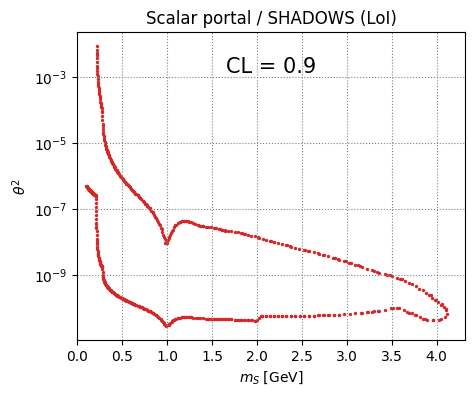

PyObject Text(0.5, 0.92, 'CL = 0.9')

In [9]:
fig, ax = make_plot(title="Scalar portal / SHADOWS (LoI)", xlabel=raw"$m_S\;[\mathrm{GeV}]$", ylabel=raw"$\theta^2$", figsize=(5,4))
ax.scatter(df.mS, df.theta2, s=2, color="tab:red")
ax.autoscale()
ax.set_xlim(left=0)
#ax.legend()
ax.text(0.5, 0.92, "CL = 0.9", fontsize=15, transform=ax.transAxes, ha="center", va="top")

In [10]:
CSV.write("$(@__DIR__)/../tables/sensitivity/SHADOWS/SHADOWS_scalar_sensitivity_CL90_unordered.csv", df)

"/Users/jl/Documents/Research/Projects/SensCalc/Code/SensMC/notebooks/../tables/sensitivity/SHADOWS/SHADOWS_scalar_sensitivity_CL90_unordered.csv"